#### Bộ dữ liệu GDP list chứa dữ liệu dự báo về GDP của một số quốc gia, các thông tin được thống kê bao gồm:

Country: Tên quốc gia

Continent: Tên châu lục

GDP (millions of US$): GDP tính theo đơn vị triệu USD

### Yêu cầu
Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.

In [1]:
# Nhập thư viện

import pandas as pd
import numpy as np

In [5]:
# Đọc dữ liệu

df = pd.read_csv('GDPlist.csv', encoding='unicode_escape')
df.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [6]:
# xem số dòng và cột của dữ liêu
df.shape

(125, 3)

In [7]:
# xem kiểu dữ liệu của các thuộc tính

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [8]:
df.describe()

,GDP (millions of US$)
count,1.250000e+02
mean,5.554278e+05
std,1.649266e+06
min,1.060000e+04
25%,2.574200e+04
50%,9.608900e+04
75%,3.332380e+05
max,1.509402e+07


### Tính giá trị lớn nhất và nhỏ nhất của GDP.


In [10]:
# tìm GDP (millions of US$) lớn nhất

df['GDP (millions of US$)'].max()

15094025

In [11]:
# tìm GDP (millions of US$) nhỏ nhất

df['GDP (millions of US$)'].min()

10600

### Hãy cho biết xu hướng phân bố dữ liệu của GDP.


<Axes: >

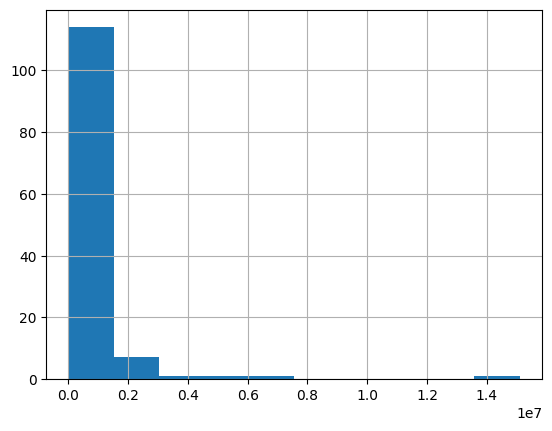

In [12]:
df['GDP (millions of US$)'].hist()

##### Nhận xét:
Dữ liệu GDP tập trung vào khoảng dưới 0,3 triệu đô

giá trị trung bình của GDP 5.554278e+05

giá trị lớn nhất max tầm 1,5 triệu đô

có xuất hiện những giá trị ngoại lai

### Hãy cho biết châu lục nào xuất hiện nhiều nhất?


In [14]:
df['Continent'].value_counts()

Continent
Europe           37
Asia             36
Africa           29
North America    11
South America     9
Oceania           3
Name: count, dtype: int64

##### Nhận xét: 
Châu âu (Europe) xuất hiện nhiều nhất với 37

### Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.

In [15]:
# Bảng 1: tính tổng GDP của mỗi châu lục

df1 = df.groupby('Continent')['GDP (millions of US$)'].sum()
df1

Continent
Africa            1820811
Asia             24425891
Europe           19139380
North America    18238447
Oceania           1662727
South America     4141217
Name: GDP (millions of US$), dtype: int64

In [16]:
# Bảng 2: trung bình cộng GDP theo chậu lục

df2 = df.groupby('Continent')['GDP (millions of US$)'].mean()
df2

Continent
Africa           6.278659e+04
Asia             6.784970e+05
Europe           5.172805e+05
North America    1.658041e+06
Oceania          5.542423e+05
South America    4.601352e+05
Name: GDP (millions of US$), dtype: float64

In [17]:
# hợp nhất 2 bảng df1 df2

df3 = pd.merge(df1, df2, on='Continent')
df3

,GDP (millions of US$)_x,GDP (millions of US$)_y
Continent,,
Africa,1820811,6.278659e+04
Asia,24425891,6.784970e+05
Europe,19139380,5.172805e+05
North America,18238447,1.658041e+06
Oceania,1662727,5.542423e+05
South America,4141217,4.601352e+05


In [18]:
# đổi tên cột cho bảng df3
df3 = df3.rename(columns={'GDP (millions of US$)_x':'GDP (sum)', 'GDP (millions of US$)_y':'GDP (mean)'})
df3

,GDP (sum),GDP (mean)
Continent,,
Africa,1820811,6.278659e+04
Asia,24425891,6.784970e+05
Europe,19139380,5.172805e+05
North America,18238447,1.658041e+06
Oceania,1662727,5.542423e+05
South America,4141217,4.601352e+05
